https://www.kaggle.com/jessevent/all-crypto-currencies/data

Observations: 785,024 Variables: 13 Crypto Tokens: 1,644
All historic open, high, low, close values for all cryptocurrencies.

* Fixed duplicate coins sharing symbol by introducing coin slug
* Data current as of 21 May 2018
* Added two new variables, close_ratio and spread
* Close ratio is the daily close rate, min-maxed with the high and low values for the day. <br>
Close Ratio = (Close-Low)/(High-Low)
* Spread is the $USD difference between the high and low values for the day.

* slug: 표기 이름
* symbol: 표기 약칭
* name: 정식 이름
* date: 거래일자
* rank: 마켓 순위 (Volume기준)
* open: 시작 가격
* high: 당일 최고가
* low: 당일 최저가
* close: 마감 가격
* volume: 거래량
* market: 마켓 내 총 수량
* close_ratio: 당일 마감 비율
    (close - low) / (high - low)
* spread: 당일 최고가와 최저가의 차이

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #'last' 기본값

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
%ls

Cryptocurrency Price.ipynb  crypto-markets.csv


In [4]:
origin = pd.read_csv("crypto-markets.csv")
origin.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [5]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785024 entries, 0 to 785023
Data columns (total 13 columns):
slug           785024 non-null object
symbol         785024 non-null object
name           785024 non-null object
date           785024 non-null object
ranknow        785024 non-null int64
open           785024 non-null float64
high           785024 non-null float64
low            785024 non-null float64
close          785024 non-null float64
volume         785024 non-null float64
market         785024 non-null float64
close_ratio    785024 non-null float64
spread         785024 non-null float64
dtypes: float64(8), int64(1), object(4)
memory usage: 77.9+ MB


In [6]:
len(origin)

785024

In [7]:
origin.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,785024.000000,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05
mean,842.650876,3.550859e+02,4.233219e+02,2.980848e+02,3.536499e+02,7.459260e+06,1.563100e+08,-inf,1.252368e+02
std,452.624872,1.403939e+04,1.733459e+04,1.157055e+04,1.396510e+04,1.817992e+08,3.478147e+09,NaN,7.379191e+03
min,1.000000,2.500000e-09,3.200000e-09,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000e+00
25%,472.000000,1.117000e-03,1.305000e-03,9.630000e-04,1.119000e-03,6.400000e+01,1.294600e+04,1.552000e-01,0.000000e+00
50%,910.000000,1.723150e-02,1.980350e-02,1.511100e-02,1.723000e-02,1.201000e+03,1.932045e+05,4.342000e-01,0.000000e+00
75%,1185.000000,2.159187e-01,2.424478e-01,1.915900e-01,2.156592e-01,3.963225e+04,3.635550e+06,7.586000e-01,4.000000e-02
max,1645.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261410e+11,1.000000e+00,1.770563e+06


In [8]:
len(origin.slug.unique())
len(origin.symbol.unique())
len(origin.name.unique())

1644

1605

1643

In [9]:
origin.name.value_counts()

HempCoin           2221
Litecoin           1866
Bitcoin            1866
Namecoin           1866
Novacoin           1865
Peercoin           1865
Feathercoin        1861
Terracoin          1851
BitBar             1838
WorldCoin          1827
Digitalcoin        1823
GoldCoin           1812
Primecoin          1792
Megacoin           1791
Anoncoin           1772
Ripple             1768
Freicoin           1767
Ixcoin             1764
Bullion            1763
Infinitecoin       1754
Quark              1745
Phoenixcoin        1731
Zetacoin           1727
Fastcoin           1700
TagCoin            1675
Argentum           1664
FlorinCoin         1653
CasinoCoin         1652
Nxt                1646
Deutsche eMark     1635
                   ... 
Digitex Futures      15
RED                  15
Aston                14
IoTeX                13
Naviaddress          10
Eximchain            10
SPINDLE              10
Level Up Coin        10
ZIP                  10
Travala              10
NKN             

In [10]:
origin[origin.name=='HempCoin']['slug'].unique()

array(['hempcoin', 'hempcoin-hmp'], dtype=object)

In [11]:
origin[origin.slug=='hempcoin'].head(10)
origin[origin.slug=='hempcoin-hmp'].head(10)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
167299,hempcoin,THC,HempCoin,2014-06-28,401,0.000102,0.000108,0.000030,0.000030,19.0,9857.0,0.0000,0.0
167300,hempcoin,THC,HempCoin,2014-06-29,401,0.000030,0.000169,0.000030,0.000169,23.0,2897.0,1.0000,0.0
167301,hempcoin,THC,HempCoin,2014-06-30,401,0.000169,0.000299,0.000102,0.000256,283.0,16501.0,0.7817,0.0
167302,hempcoin,THC,HempCoin,2014-07-01,401,0.000256,0.000362,0.000244,0.000301,400.0,25146.0,0.4831,0.0
167303,hempcoin,THC,HempCoin,2014-07-02,401,0.000301,0.000326,0.000169,0.000169,109.0,29754.0,0.0000,0.0
167304,hempcoin,THC,HempCoin,2014-07-03,401,0.000325,0.001250,0.000180,0.000709,1019.0,32256.0,0.4944,0.0
167305,hempcoin,THC,HempCoin,2014-07-04,401,0.000710,0.001064,0.000291,0.000568,830.0,70674.0,0.3583,0.0
167306,hempcoin,THC,HempCoin,2014-07-05,401,0.000409,0.000601,0.000308,0.000372,314.0,40962.0,0.2184,0.0
167307,hempcoin,THC,HempCoin,2014-07-06,401,0.000373,0.000942,0.000361,0.000388,194.0,37461.0,0.0465,0.0
167308,hempcoin,THC,HempCoin,2014-07-07,401,0.000388,0.000471,0.000352,0.000356,276.0,39246.0,0.0336,0.0


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
622287,hempcoin-hmp,HMP,HempCoin,2016-02-16,1232,0.000012,0.000012,0.000012,0.000012,15.0,0.0,0.0000,0.0
622288,hempcoin-hmp,HMP,HempCoin,2016-02-17,1232,0.000012,0.000013,0.000008,0.000012,20.0,0.0,0.8000,0.0
622289,hempcoin-hmp,HMP,HempCoin,2016-02-18,1232,0.000012,0.000038,0.000012,0.000025,275.0,0.0,0.5000,0.0
622290,hempcoin-hmp,HMP,HempCoin,2016-02-19,1232,0.000025,0.000156,0.000025,0.000126,788.0,0.0,0.7710,0.0
622291,hempcoin-hmp,HMP,HempCoin,2016-02-20,1232,0.000126,0.000153,0.000046,0.000096,641.0,0.0,0.4673,0.0
622292,hempcoin-hmp,HMP,HempCoin,2016-02-21,1232,0.000096,0.000106,0.000066,0.000083,322.0,0.0,0.4250,0.0
622293,hempcoin-hmp,HMP,HempCoin,2016-02-22,1232,0.000083,0.000092,0.000018,0.000035,366.0,0.0,0.2297,0.0
622294,hempcoin-hmp,HMP,HempCoin,2016-02-23,1232,0.000035,0.000068,0.000021,0.000029,158.0,0.0,0.1702,0.0
622295,hempcoin-hmp,HMP,HempCoin,2016-02-24,1232,0.000029,0.000425,0.000029,0.000068,817.0,0.0,0.0985,0.0
622296,hempcoin-hmp,HMP,HempCoin,2016-02-25,1232,0.000064,0.000148,0.000046,0.000068,249.0,0.0,0.2157,0.0


In [12]:
origin.slug.unique()

array(['bitcoin', 'ethereum', 'ripple', ..., 'entcash', 'jingtum-tech',
       'aston'], dtype=object)

In [13]:
origin.name.unique()

array(['Bitcoin', 'Ethereum', 'Ripple', ..., 'ENTCash', 'Jingtum Tech',
       'Aston'], dtype=object)

In [14]:
origin.slug.value_counts().nlargest(10)

litecoin       1866
bitcoin        1866
namecoin       1866
peercoin       1865
novacoin       1865
feathercoin    1861
terracoin      1851
bitbar         1838
worldcoin      1827
digitalcoin    1823
Name: slug, dtype: int64

In [15]:
origin.symbol.value_counts().nlargest(10)

NET    1955
NMC    1866
BTC    1866
LTC    1866
NVC    1865
PPC    1865
FTC    1861
TRC    1851
BTB    1838
WDC    1827
Name: symbol, dtype: int64

In [16]:
origin[origin['symbol']=='NET']['slug'].unique()

array(['nimiq', 'netcoin'], dtype=object)

In [17]:
origin[origin['symbol']=='LTC']['slug'].unique()

array(['litecoin'], dtype=object)

-------

In [18]:
origin['date'] = pd.to_datetime(origin['date'], format='%Y-%m-%d')

In [19]:
type(origin['date'][0])

pandas._libs.tslib.Timestamp

In [20]:
#pd.value_counts(origin['slug']).plot.bar()

In [21]:
origin.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')

In [22]:
min(origin['date'])
max(origin['date'])

Timestamp('2013-04-28 00:00:00')

Timestamp('2018-06-06 00:00:00')

--------

In [23]:
origin.ranknow.unique()

array([   1,    2,    3, ..., 1643, 1644, 1645])

In [24]:
origin.loc[origin['symbol']=='NET']['ranknow'].unique()

array([ 523, 1095])

In [25]:
origin.loc[origin['symbol']=='NET']['name'].unique()

array(['Nimiq Exchange Token', 'NetCoin'], dtype=object)

In [26]:
len(origin.groupby('ranknow')['name'].unique())

1644

In [27]:
origin.groupby('ranknow')['slug'].unique().head(10)

ranknow
1          [bitcoin]
2         [ethereum]
3           [ripple]
4     [bitcoin-cash]
5              [eos]
6         [litecoin]
7          [stellar]
8          [cardano]
9             [iota]
10            [tron]
Name: slug, dtype: object

------

In [28]:
corrMatt = origin[["open", "high", "low", "close", "volume", "market", "close_ratio", "spread"]]
corrMatt = corrMatt.corr()
print(corrMatt)

                 open      high       low     close    volume    market  \
open         1.000000  0.967526  0.971012  0.956207  0.010411  0.011398   
high         0.967526  1.000000  0.947080  0.971402  0.008690  0.009458   
low          0.971012  0.947080  1.000000  0.971565  0.012038  0.013291   
close        0.956207  0.971402  0.971565  1.000000  0.010470  0.011448   
volume       0.010411  0.008690  0.012038  0.010470  1.000000  0.896761   
market       0.011398  0.009458  0.013291  0.011448  0.896761  1.000000   
close_ratio -0.000680  0.000100  0.000750  0.003606  0.009434  0.008828   
spread       0.750289  0.864099  0.656807  0.758528  0.001537  0.001378   

             close_ratio    spread  
open           -0.000680  0.750289  
high            0.000100  0.864099  
low             0.000750  0.656807  
close           0.003606  0.758528  
volume          0.009434  0.001537  
market          0.008828  0.001378  
close_ratio     1.000000 -0.000940  
spread         -0.000940  1.

In [29]:
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

/usr/local/lib/python3.5/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.4.3 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)


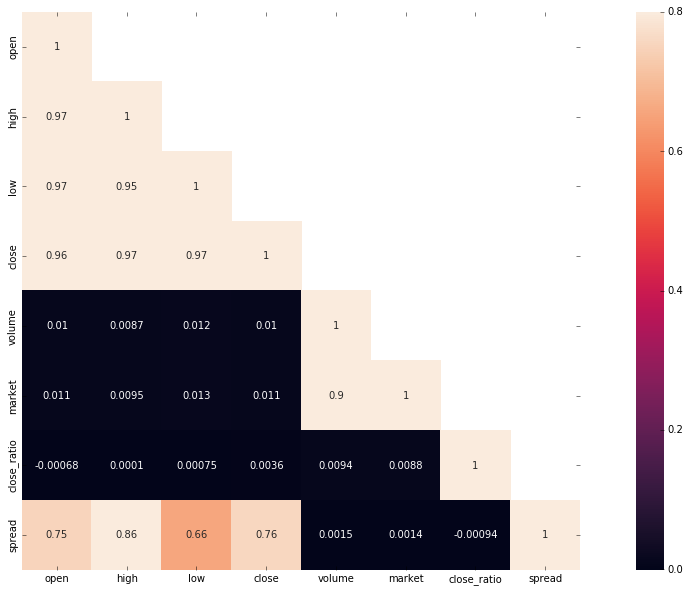

In [30]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=True, annot=True)

In [31]:
bitcoin = origin.loc[origin['slug']=='bitcoin', ['date', 'open', 'high', 'low', 'close']]

In [32]:
bitcoin.date.is_unique

True

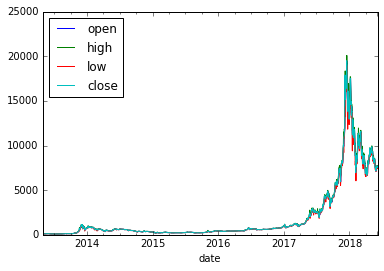

In [33]:
bitcoin.set_index('date').plot()

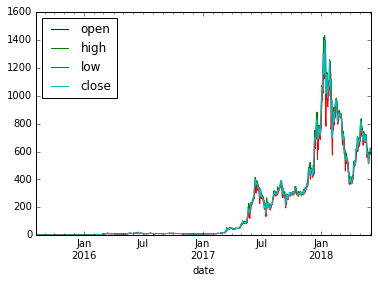

In [34]:
ethereum = origin.loc[origin['slug']=='ethereum', ['date', 'open', 'high', 'low', 'close']]
ethereum.set_index('date').plot()

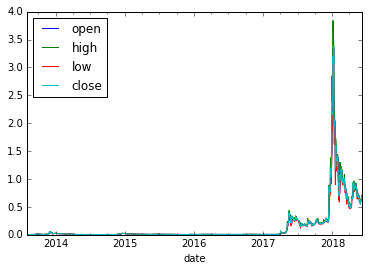

In [35]:
ripple = origin.loc[origin['slug']=='ripple', ['date', 'open', 'high', 'low', 'close']]
ripple.set_index('date').plot()

In [36]:
import matplotlib.pyplot as plt

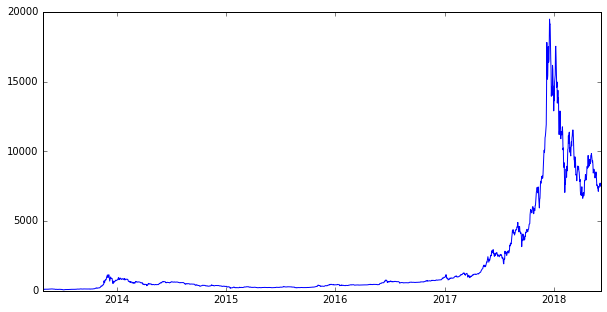

In [37]:
plt.figure(figsize=(10,5))
plt.plot(bitcoin['date'], bitcoin['open'])
plt.show()

In [38]:
origin.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')

In [39]:
# origin.groupby('date').mean().open

In [40]:
unique_date = origin['date'].unique()
all_mean = origin.groupby('date').mean()

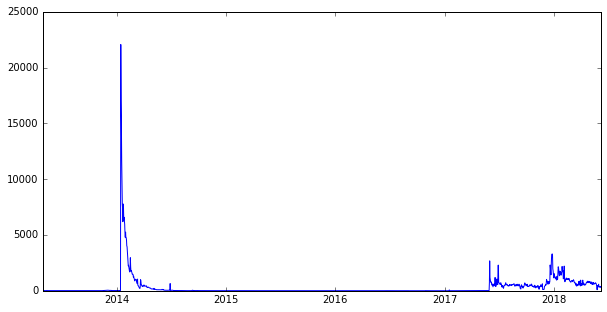

In [41]:
plt.figure(figsize=(10,5))
plt.plot(unique_date, all_mean.high)
plt.show()

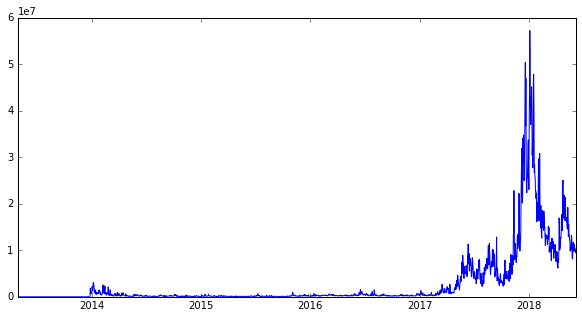

In [42]:
plt.figure(figsize=(10,5))
plt.plot(unique_date, all_mean.volume)
plt.show()

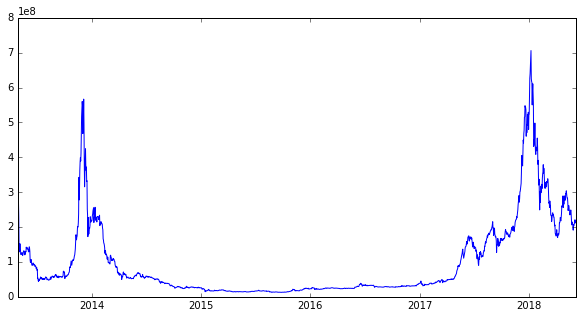

In [43]:
plt.figure(figsize=(10,5))
plt.plot(unique_date, all_mean.market)
plt.show()

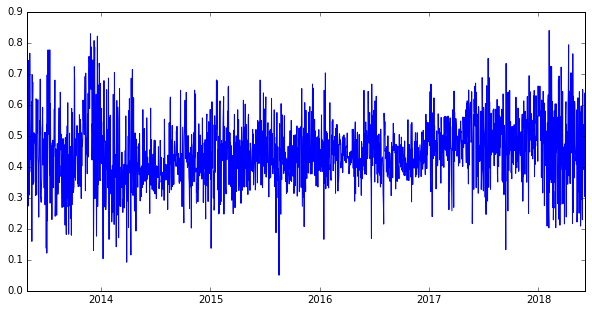

In [44]:
plt.figure(figsize=(10,5))
plt.plot(unique_date, all_mean.close_ratio)
plt.show()

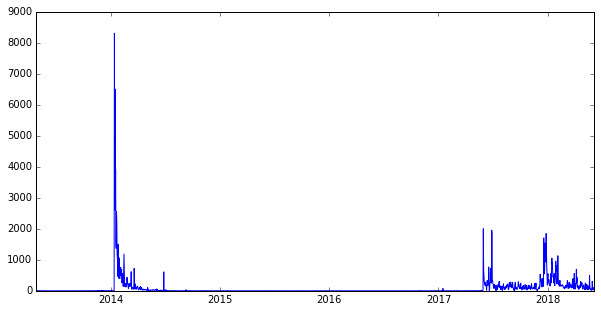

In [45]:
plt.figure(figsize=(10,5))
plt.plot(unique_date, all_mean.spread)
plt.show()

In [46]:
# origin.groupby('date').mean().open.nlargest(100)

In [47]:
# open100 = origin.groupby('date').mean().open.nlargest(100)
# open100.head()

In [48]:
# open100.plot()

In [49]:
origin.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market', 'close_ratio', 'spread'],
      dtype='object')

In [50]:
origin.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


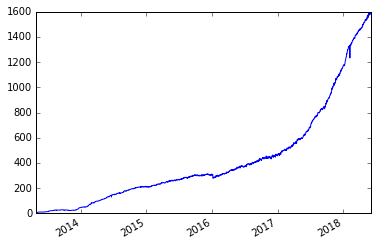

In [51]:
origin['date'].value_counts().plot()

----------

In [52]:
top10 = origin.loc[origin['ranknow']<11]
top10.sample(10)

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
5725,litecoin,LTC,Litecoin,2014-05-29,6,11.010000,11.050000,10.780000,10.780000,2.006930e+06,3.169040e+08,0.0000,0.27
7117,litecoin,LTC,Litecoin,2018-03-21,6,169.560000,175.260000,166.620000,169.050000,4.625360e+08,9.447220e+09,0.2813,8.64
6228,litecoin,LTC,Litecoin,2015-10-14,6,3.180000,3.200000,3.100000,3.140000,1.781770e+06,1.358800e+08,0.4000,0.10
1669,bitcoin,BTC,Bitcoin,2017-11-22,1,8077.950000,8302.260000,8075.470000,8253.550000,3.633530e+09,1.348510e+11,0.7852,226.79
3760,ripple,XRP,Ripple,2015-12-11,3,0.008445,0.008453,0.007793,0.008441,3.465490e+06,2.832390e+08,0.9818,0.00
4789,bitcoin-cash,BCH,Bitcoin Cash,2017-11-20,4,1172.430000,1236.010000,1167.280000,1236.010000,8.000530e+08,1.971020e+10,1.0000,68.73
4978,bitcoin-cash,BCH,Bitcoin Cash,2018-05-28,4,996.650000,1005.650000,884.050000,892.120000,5.661680e+08,1.709380e+10,0.0664,121.60
1414,bitcoin,BTC,Bitcoin,2017-03-12,1,1176.620000,1226.980000,1175.360000,1221.380000,2.271760e+08,1.907330e+10,0.8915,51.62
4268,ripple,XRP,Ripple,2017-05-02,3,0.054646,0.055639,0.050710,0.053908,3.381470e+07,2.070240e+09,0.6488,0.00
3221,ripple,XRP,Ripple,2014-06-20,3,0.004230,0.004309,0.004167,0.004188,1.576770e+05,3.307320e+07,0.1479,0.00


In [53]:
top10.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,9472.000000,9472.000000,9472.000000,9472.000000,9472.000000,9.472000e+03,9.472000e+03,9472.000000,9472.000000
mean,4.341639,435.928480,452.821173,417.484706,436.775952,4.372071e+08,1.069706e+10,0.503998,35.336332
std,2.611477,1659.561519,1727.070027,1578.752101,1661.008609,1.536861e+09,2.976947e+10,0.307360,177.291657
min,1.000000,0.001352,0.001509,0.001091,0.001357,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2.000000,0.017370,0.018569,0.016282,0.017447,5.827235e+05,1.518838e+08,0.236250,0.000000
50%,4.000000,3.050000,3.130000,2.965000,3.050000,1.177615e+07,9.300935e+08,0.500000,0.140000
75%,6.000000,222.370000,228.310000,213.835000,222.247500,1.660862e+08,7.234430e+09,0.778350,6.280000
max,10.000000,19475.800000,20089.000000,18974.100000,19497.400000,2.384090e+10,3.261410e+11,1.000000,4110.400000


In [54]:
origin.describe()

,ranknow,open,high,low,close,volume,market,close_ratio,spread
count,785024.000000,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05,7.850240e+05
mean,842.650876,3.550859e+02,4.233219e+02,2.980848e+02,3.536499e+02,7.459260e+06,1.563100e+08,-inf,1.252368e+02
std,452.624872,1.403939e+04,1.733459e+04,1.157055e+04,1.396510e+04,1.817992e+08,3.478147e+09,NaN,7.379191e+03
min,1.000000,2.500000e-09,3.200000e-09,9.200000e-14,0.000000e+00,0.000000e+00,0.000000e+00,-inf,0.000000e+00
25%,472.000000,1.117000e-03,1.305000e-03,9.630000e-04,1.119000e-03,6.400000e+01,1.294600e+04,1.552000e-01,0.000000e+00
50%,910.000000,1.723150e-02,1.980350e-02,1.511100e-02,1.723000e-02,1.201000e+03,1.932045e+05,4.342000e-01,0.000000e+00
75%,1185.000000,2.159187e-01,2.424478e-01,1.915900e-01,2.156592e-01,3.963225e+04,3.635550e+06,7.586000e-01,4.000000e-02
max,1645.000000,2.298390e+06,2.926100e+06,2.030590e+06,2.300740e+06,2.384090e+10,3.261410e+11,1.000000e+00,1.770563e+06


In [55]:
origin[origin['close']==0].head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
479279,ethereum-movie-venture,EMV,Ethereum Movie Venture,2017-05-28,1064,0.54856,0.622543,9.200000e-14,0.0,3271.0,3602210.0,0.0,0.62


In [56]:
origin[origin['volume']==0].head()
len(origin[origin['volume']==0])

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


31749

In [57]:
origin[origin['volume']==0].tail()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
781396,bitok,BITOK,Bitok,2017-12-03,1630,0.000109,0.000111,0.000009,0.000009,0.0,0.0,0.0000,0.00
781612,aseancoin,ASN,Aseancoin,2017-10-04,1631,0.001771,0.001782,0.001720,0.001729,0.0,0.0,0.1452,0.00
781613,aseancoin,ASN,Aseancoin,2017-10-05,1631,0.001731,0.001734,0.001729,0.001734,0.0,0.0,1.0000,0.00
781619,aseancoin,ASN,Aseancoin,2017-10-11,1631,0.004667,0.004684,0.002458,0.002508,0.0,0.0,0.0225,0.00
783131,madcoin,MDC,Madcoin,2018-04-12,1637,0.005248,0.016607,0.003976,0.016528,0.0,9549.0,0.9937,0.01


In [58]:
origin[origin['market']==0].head()
len(origin[origin['market']==0])

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1866,ethereum,ETH,Ethereum,2015-08-07,2,2.83,3.54,2.52,2.77,164329.0,0.0,0.2451,1.02
4669,bitcoin-cash,BCH,Bitcoin Cash,2017-07-23,4,555.89,578.97,411.78,413.06,85013.0,0.0,0.0077,167.19
4670,bitcoin-cash,BCH,Bitcoin Cash,2017-07-24,4,412.58,578.89,409.21,440.70,190952.0,0.0,0.1856,169.68
4671,bitcoin-cash,BCH,Bitcoin Cash,2017-07-25,4,441.35,541.66,338.09,406.90,524908.0,0.0,0.3380,203.57
4672,bitcoin-cash,BCH,Bitcoin Cash,2017-07-26,4,407.08,486.16,321.79,365.82,1784640.0,0.0,0.2679,164.37


102712

In [59]:
origin[origin['close_ratio']==min(origin['close_ratio'])]

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
336513,gcn-coin,GCN,GCN Coin,2014-11-16,792,4.000000e-08,4.100000e-08,4.100000e-08,4.000000e-08,1.0,2443.0,-inf,0.0


In [60]:
origin[origin['close']<origin['low']].head()
len(origin[origin['close']<origin['low']])

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
137369,paccoin,$PAC,PACcoin,2015-11-22,324,6.500000e-09,6.600000e-09,5.800000e-09,5.700000e-09,22.0,0.0,-0.1250,0.0
137396,paccoin,$PAC,PACcoin,2015-12-19,324,6.500000e-09,7.900000e-09,5.400000e-09,5.300000e-09,10.0,0.0,-0.0400,0.0
137414,paccoin,$PAC,PACcoin,2016-01-06,324,6.800000e-09,7.300000e-09,6.200000e-09,6.100000e-09,13.0,0.0,-0.0909,0.0
137426,paccoin,$PAC,PACcoin,2016-01-18,324,6.200000e-09,6.400000e-09,5.900000e-09,5.800000e-09,8.0,0.0,-0.2000,0.0
137599,paccoin,$PAC,PACcoin,2016-07-09,324,8.900000e-09,1.000000e-08,8.300000e-09,8.200000e-09,1.0,0.0,-0.0588,0.0


31

------

In [79]:
bit_max_date = max(origin[origin['slug']=='bitcoin']['date'])
a = (origin.groupby('slug')['date'].max()<bit_max_date)
a = a.reset_index()

a.loc[a.date==True,'slug']

63                            antimatter
72                                 arbit
85                             aseancoin
87                          asiadigicoin
88                                 aston
146                          bios-crypto
192                                bitok
201                      bitshares-music
212                                 bitz
258                             britcoin
300                               centra
354                               copico
365                              creatio
388                   cryptoworldx-token
390                    cthulhu-offerings
399                         cycling-coin
409                              darcrus
410                             darklisk
436                         deltacredits
484                            dreamcoin
542                              entcash
567               ethereum-movie-venture
624                              flycoin
653                          gbcgoldcoin
668             

In [61]:
bit_max_date = max(origin[origin['slug']=='bitcoin']['date'])
sum(origin.groupby('slug')['date'].max()<bit_max_date)
#origin.groupby('slug')[origin.groupby('name')['date'].max()<bit_max_date]

(origin.groupby('slug')['date'].max()<bit_max_date)==True

52